In [2]:
%matplotlib widget 

In [1]:

import pdb
import numpy as np

import json
import os
import re
import csv

def extract_numeric_part(s):
    match = re.search(r'\d+', s)
    if match:
        return int(match.group())
    return float('inf')

def find_indices(list_to_check, item_to_find):
    array = np.array(list_to_check)
    indices = np.where(array == item_to_find)[0]
    return list(indices)

csv_path = '/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/dimple'
dimple_pth='/dls/i23/data/2024/nr29467-33/processing/tomography/dimple/insulin'
#crystals = ['insulin', 'proteinasek']
prefix='auto'
data_list=[]
for dir_pth in os.listdir(dimple_pth):
    if os.path.isdir(os.path.join(dimple_pth, dir_pth)) is False:
        continue
    
    data_list.append(dir_pth)

sorted_data_list = sorted(data_list)

dataset_list= sorted_data_list
#single_num=len(sorted_data_list)
single_num=len(data_list)
print(dataset_list)

#for crystal in crystals:
for dir_pth in (dataset_list):
    final_result=[['set_id', 'method', 'SG_A:CYS11', 'SG_A:CYS20', 'SG_A:CYS7', 'SG_B:CYS7', 'SG_B:CYS19']]
    counter=0
    atoms_to_find = final_result[0][2:]

    for target in ['acsh','sh', 'ac']:
        
        i = dataset_list.index(dir_pth)
        try:
            if i < single_num:
                with open(os.path.join(dimple_pth, dir_pth, target, 'anode.lsa'), 'r') as file:
                    lines = file.readlines()

        except:
            continue
            
        # Find the start and end indices of the table
        start_index = None
        end_index = None
        for i, line in enumerate(lines):
            if '          X        Y        Z   Height(sig)  SOF     Nearest atom' in line:
                start_index = i + 2#1
                
            elif 'Peaks output to file' in line:
                end_index = i - 1
                
        print(f'{dir_pth}, {target}')
        
        table_data = []
        atom_list = []
        peak_list = []
        for line in lines[start_index:end_index]:
            #print(line)
            
            # Remove leading/trailing whitespaces and split the line into columns
            columns = line.strip().split()
            atom_list.append(columns[-1])
            peak_list.append(columns[4])

            # Convert the columns to floats
            row_data = [col for col in columns]
            table_data.append(row_data)
        
        # Convert the table data to a NumPy array
        #table_array = np.array(table_data)
        row=[f'{dir_pth.replace("p",".").replace("_",":").replace("ls:3.0","LS").replace("con:3.0","Control")}']
        row.append(f':{target}:')

        for label in atoms_to_find:

            if atom_list.count(label) > 1:
                indexes = (np.where(np.array(atom_list) == label))[0]#.tolist()
                #duplicate_peaks = peak_list[atom_list.index('ZN_C:ZN405')]
                duplicate_peaks = np.array(peak_list)[indexes]
                duplicate_peaks = np.asarray(duplicate_peaks, dtype=float)
                max_peak = np.max((duplicate_peaks))
                row.append(str(max_peak))

            elif atom_list.count(label) == 1:
                row.append(peak_list[atom_list.index(label)])
            
            elif any(atom == label for atom in atom_list) == False:
                row.append(np.nan)

        final_result.append(row)

        dataset_filename = f'{csv_path}/ins_{dir_pth}_peaks.csv'.format(target)
        with open(dataset_filename, 'w') as dataset_file:
            writer = csv.writer(dataset_file, delimiter=' ', escapechar=' ', quoting=csv.QUOTE_NONE)
            for r in final_result:
                writer.writerow(r)



['con_3p0', 'con_3p5', 'ls_3p0', 'ls_3p5']
con_3p0, acsh
con_3p0, sh
con_3p0, ac
con_3p5, acsh
con_3p5, sh
con_3p5, ac
ls_3p0, acsh
ls_3p0, sh
ls_3p0, ac
ls_3p5, acsh
ls_3p5, sh
ls_3p5, ac


    set_id  method  SG_A:CYS11  SG_A:CYS20  SG_A:CYS7  SG_B:CYS7  SG_B:CYS19
0  Control  :acsh:       15.09       14.86      12.45      11.87         NaN
1  Control    :sh:       14.72       14.67      12.01        NaN         NaN
2  Control    :ac:       14.84       14.81      12.40      11.81         NaN
0       LS  :acsh:       15.76         NaN      12.45      12.81       14.28
1       LS    :sh:       15.65         NaN        NaN      12.93       14.82
2       LS    :ac:       15.32         NaN      12.49      12.80       14.09


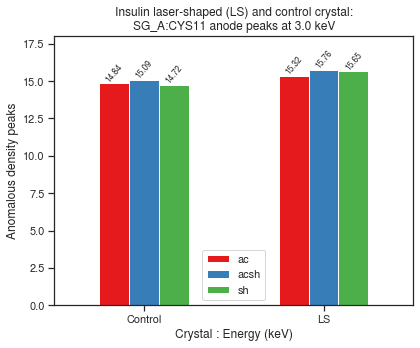

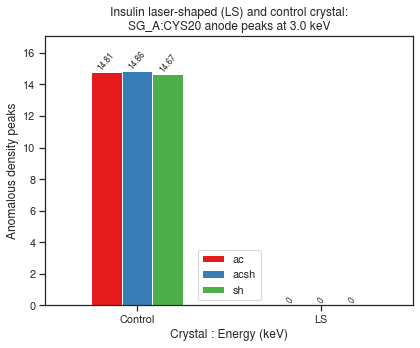

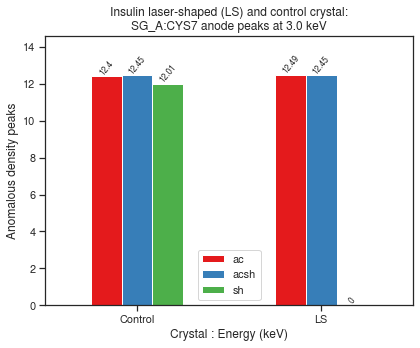

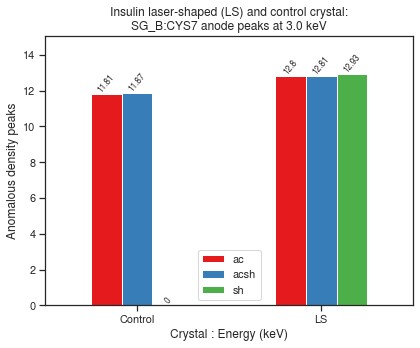

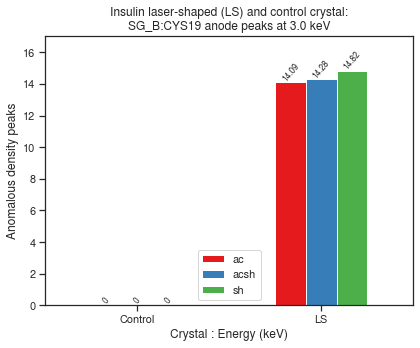

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/dimple/ins_con_3p0_peaks.csv',
    #'/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/dimple/ins_con_3p5_peaks.csv',
    '/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/dimple/ins_ls_3p0_peaks.csv',
    #'/dls/i23/data/2024/nr29467-33/processing/tomography/results/csvs/dimple/ins_ls_3p5_peaks.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
atoms_to_find = ['SG_A:CYS11', 'SG_A:CYS20', 'SG_A:CYS7', 'SG_B:CYS7', 'SG_B:CYS19']

for i, file_path in enumerate(file_paths, start=0):
    df = pd.read_csv(file_path, sep=(' '))#, names=['set_id', 'method', 'value'], skiprows=0, sep=('  '))
    #df['set_id'] = f"Set {i}"  # Adding a set identifier
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
print(combined_data)
# Melting the combined DataFrame
#melted_combined_data = combined_data.melt(id_vars=['method', 'set_id'], var_name='label', value_name='value')
combined_data = combined_data.melt(id_vars=['set_id', 'method'], var_name='label', value_name='value')
#filtered_combined_data = melted_combined_data#.dropna(subset=['value'])
combined_data = combined_data.fillna(0)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']

#plt.style.use('seaborn-dark-palette')

for atom in atoms_to_find:
    plot_data = combined_data[combined_data['label'].str.contains(f'{atom}')]
    
    final_averages = [[], [], []]
    
    ac = plot_data[plot_data['method']==':ac:']
    acsh = plot_data[plot_data['method']==':acsh:']
    sh = plot_data[plot_data['method']==':sh:']

    final_averages[0].append((ac['value']))
    final_averages[1].append((acsh['value']))
    final_averages[2].append((sh['value']))
    
    #sns.set_style("darkgrid")
    #cm = sns.color_palette("crest", as_cmap=True)
    sns.set(palette='Set1', style='ticks') # Set2
    #plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'Nimbus Sans'
    ax = pd.DataFrame({'ac':list(ac['value']), 'acsh':list(acsh['value']), 'sh':list(sh['value'])}, index=list(ac['set_id']))
    ax = ax.plot(kind='bar', legend=True, figsize=(6,5))
    
    for container in ax.containers:        
        ax.bar_label(container, rotation=50, fontsize='x-small')
    lim = ax.get_ylim()
    ax.set_ylim(lim[0], lim[1]+1.5)
    ax.legend(loc='lower center')
    plt.xlabel('Crystal : Energy (keV)')
    plt.ylabel('Anomalous density peaks')
    plt.xticks(rotation=0)
    plt.title(f'Insulin laser-shaped (LS) and control crystal:\n{atom} anode peaks at 3.0 keV')
    plt.tight_layout()
    plt.savefig(f"/dls/i23/data/2024/nr29467-33/processing/tomography/results/plots/dimple/insulin/{atom.replace(':', '_')}.png")
    plt.savefig(f"/home/icf19162/CP5-Thesis/plots/exp2/peaks/ins_{atom.replace(':', '_')}.png", dpi=300)
    plt.show()
